In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv('../20211201 머신러닝 1일차/citrus.csv')

In [5]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


### 직경, 무게 데이터 추출

In [6]:
diameter = df['diameter']
weight = df['weight']

### target 데이터 추출

In [20]:
target = df['name']

### 직경, 무게 데이터 array

In [10]:
diameter_arr = np.array(diameter)
weight_arr = np.array(weight)

In [12]:
arr = np.column_stack([diameter_arr, weight_arr])

### target 데이터 toarray

In [21]:
target_arr = np.array(target)

### 인덱스 셔플

In [22]:
index = np.arange(len(arr))
np.random.seed(24)
np.random.shuffle(index)

In [44]:
index

array([5821, 2516, 4282, ..., 3473, 8535,  899])

### train, test 데이터 나누기

In [24]:
train_input = arr[index[:9000]]
test_input = arr[index[9000:]]

train_target = target_arr[index[:9000]]
test_target = target_arr[index[9000:]]

### KNN 모델 만들기

In [25]:
kn = KNeighborsClassifier()

In [26]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [27]:
kn.score(test_input, test_target)

0.969

In [29]:
kn.predict(test_input)

array(['orange', 'grapefruit', 'orange', 'grapefruit', 'orange', 'orange',
       'grapefruit', 'grapefruit', 'grapefruit', 'grapefruit', 'orange',
       'grapefruit', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'grapefruit', 'grapefruit', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'grapefruit', 'orange', 'orange', 'grapefruit', 'grapefruit',
       'grapefruit', 'grapefruit', 'grapefruit', 'orange', 'orange',
       'orange', 'orange', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'orange', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'grapefruit', 'grapefruit', 'grapefruit', 'grapefruit',
       'grapefruit', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'orange', 'grapefruit', 'grapefruit', 'orange', 'grapefruit',
       'grapefruit', 'grapefruit', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'orange', 'grapefruit', 'grapefruit', 'orange', 'orange',
       'orange', '

In [30]:
test_target

array(['orange', 'grapefruit', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'grapefruit', 'grapefruit', 'grapefruit', 'grapefruit',
       'orange', 'grapefruit', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'grapefruit', 'grapefruit', 'orange', 'grapefruit',
       'grapefruit', 'orange', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'grapefruit', 'grapefruit', 'orange', 'grapefruit',
       'grapefruit', 'grapefruit', 'grapefruit', 'grapefruit', 'orange',
       'orange', 'orange', 'orange', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'orange', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'grapefruit', 'grapefruit', 'grapefruit', 'grapefruit',
       'grapefruit', 'orange', 'grapefruit', 'grapefruit', 'orange',
       'orange', 'grapefruit', 'grapefruit', 'orange', 'grapefruit',
       'grapefruit', 'grapefruit', 'orange', 'grapefruit', 'grapefruit',
       'orange', 'orange', 'grapefruit', 'grapefruit', 'orange', 'orange',
       'or

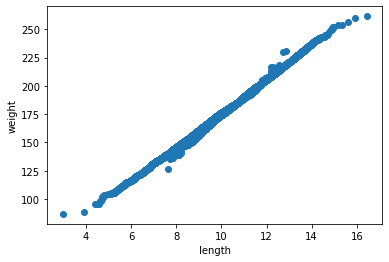

In [49]:
plt.scatter(train_input[:,0], train_input[:,1])
# plt.scatter(test_input_scaled[:,0], test_input_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## Scale 변환

In [35]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [36]:
train_scaled = (train_input - mean) / std

In [37]:
test_input_scaled = (test_input - mean) / std

In [38]:
kn = KNeighborsClassifier()

In [40]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [41]:
kn.score(test_input_scaled, test_target)

0.996

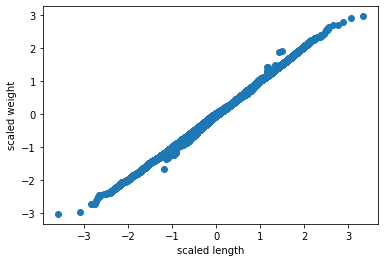

In [47]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
# plt.scatter(test_input_scaled[:,0], test_input_scaled[:,1])
plt.xlabel('scaled length')
plt.ylabel('scaled weight')
plt.show()